In [6]:
import mglearn
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
people=fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape=people.images[0].shape
print(image_shape)

(87, 65)


### 얼굴 이미지 10개 표시하기

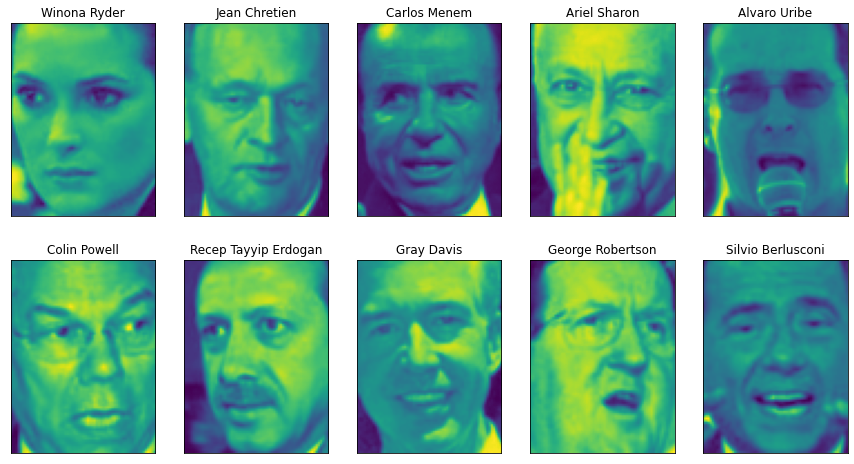

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw= {'xticks':(), 'yticks':() })

for target, image, ax in zip(people.target, people.images, axes.ravel() ):
    ax.imshow(image) # 이미지 표시 
    ax.set_title(people.target_names[target]) # 이미지별 이름

In [9]:
len(np.unique(people.target))

62

In [10]:
print("이미지 크기:", people.images.shape)
print("클래스 개수:", len(people.target_names))

이미지 크기: (3023, 87, 65)
클래스 개수: 62


### 각 사람의 이미지는 몇 장씩 있는가?

In [12]:
# 타깃 값의 각각의 데이터 개수
counts = np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [15]:
print('사람 이름 : \n',people.target_names)

사람 이름 : 
 ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods

In [16]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.
for i, (count, name) in enumerate( zip(counts, people.target_names) ):
    print("{0:25} {1:3}".format(name, count), end= '   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [19]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.(한줄에 두사람씩 나오도록)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:5}, {1:25}".format(count, name), end="   ")
    if (i + 1) % 2 == 0:
        print()

   39, Alejandro Toledo               35, Alvaro Uribe                
   21, Amelie Mauresmo                36, Andre Agassi                
   20, Angelina Jolie                 77, Ariel Sharon                
   42, Arnold Schwarzenegger          24, Atal Bihari Vajpayee        
   29, Bill Clinton                   21, Carlos Menem                
  236, Colin Powell                   31, David Beckham               
  121, Donald Rumsfeld                22, George Robertson            
  530, George W Bush                 109, Gerhard Schroeder           
   44, Gloria Macapagal Arroyo        26, Gray Davis                  
   30, Guillermo Coria                22, Hamid Karzai                
   39, Hans Blix                      71, Hugo Chavez                 
   20, Igor Ivanov                    28, Jack Straw                  
   52, Jacques Chirac                 55, Jean Chretien               
   21, Jennifer Aniston               42, Jennifer Capriati           
   21,

### 어떤 이미지 장수가 많을까?
* 전체 이미지 수에 False로 매핑
* 각 사람의 순서대로 50개씩, True로 값을 지정

In [20]:
people.target.shape

(3023,)

In [38]:
nums = people.target.shape  # 이미지의 수
mask = np.zeros(nums, dtype=np.bool)
mask

array([False, False, False, ..., False, False, False])

In [39]:
# 중복값을 제외한 값을 표시
np.unique(people.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [42]:
# 각 사람별 50명씩 선택
nums = np.unique(people.target)

for target in nums:
    mask[np.where(people.target==target)[0][:50]] = 1 # 각 사람별 50장 선택

# 전체 데이터의 1로 되어 있는 것을 가져오기
X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

### 주어진 데이터를 이용해서 지도학습 모델에 적용시켜보기
* 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾으려는 KNN 사용

In [43]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
        X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeightborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수:0.23


### PCA를 이용, 87x65개의 특징을 갖는 성분을 100개의 주성분으로 만들고
### 이를 이용해 ML 모델에 적용시켜보기 

In [44]:
from sklearn.decomposition import PCA

In [45]:
# 화이트닝 옵션은 PCA변환을 할 때 이 표준편차를 나누어 적용. 
# PCA 변환은 데이터의 평균을 0으로 만들어주므로 화이트닝을 적용하는 것은 PCA변환한 뒤에 StandardScaler를 적용하는 것과 같다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("테스트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 정확도 : 0.31


* 기본 이미지 87x65개의 데이터 사용할 때 -> 21%
* 변환 이미지(정규화, 주성분 100) 데이터를 사용할 때 -> 31%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
        X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeightborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))